In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [3]:
cwd = os.getcwd()
cancel = pd.read_csv(cwd + '/cancel.csv')

In [105]:
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [106]:
yearly

{'Total Flights': 6951793,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 454162,
  'December Flights': 464205},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1545252,
  'Winter Flights': 1629266},
 'Airlines': {'Endeavor Air': 205728,
  'American Airlines': 909554,
  'Alaska Airlines': 234333,
  'JetBlue': 303722,
  'Delta Airlines': 945194,
  'ExpressJet': 216089,
  'Frontier Airlines': 118871,
  'Allegiant Air': 80908,
  'Hawaiian Airlines': 82904,
  'Envoy Air': 245812,
  'Spirit Airlines': 172771,
  'PSA Airlines': 232630,
  'SkyWest Airlines': 767028,
  'United Airlines': 615683,
  'Virgin American': 30111,
  'SouthWest Airlines': 1347369,
  'Mesa Airlines': 178097,
  'Republic Air

## Monthly 

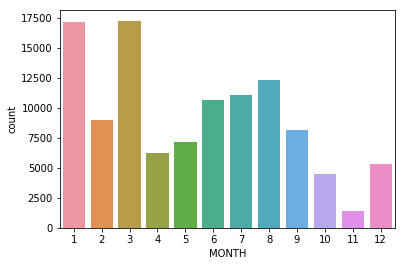

In [6]:
sns.countplot(cancel['MONTH'])

In [7]:
# charting how many cancelations for each month
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = cancel['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

In [9]:
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))

# for x in range(len(f)):
#     print(str(round((freq[x]/f[x]) * 100,2)) + "%" )

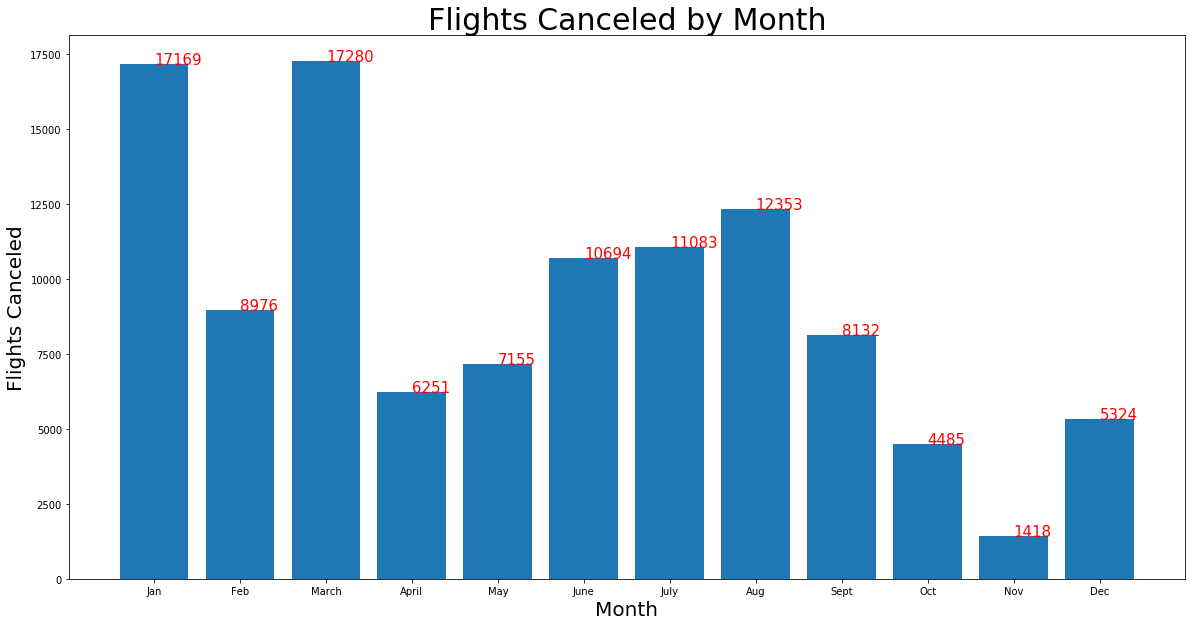

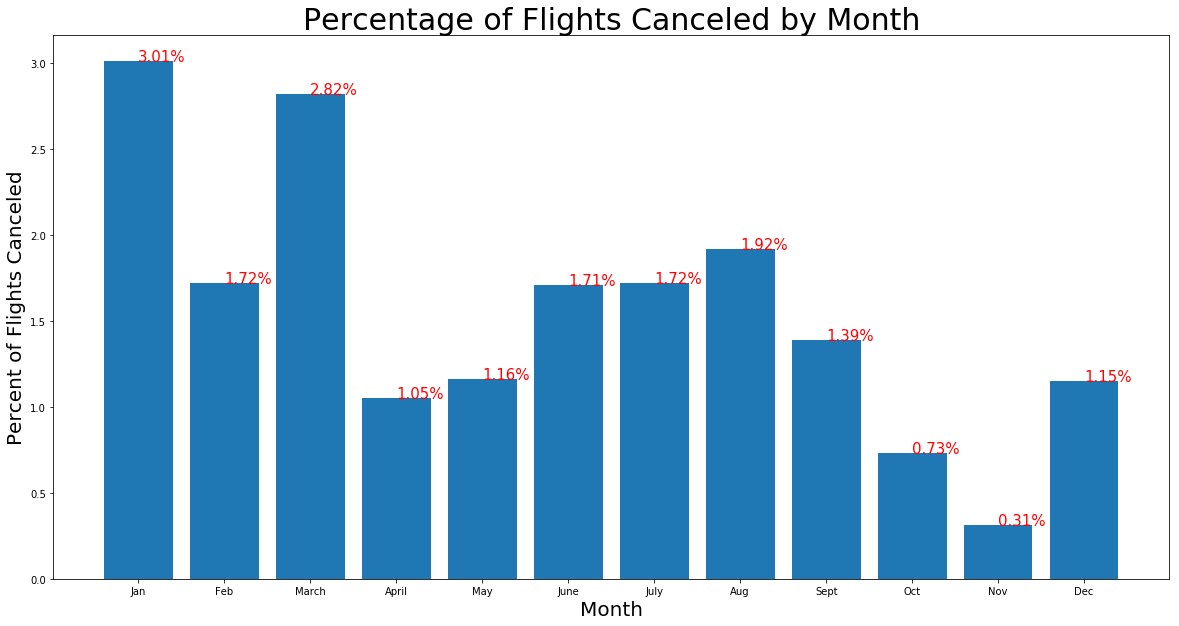

In [220]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(month, freq):
    plt.text(a, b, str(b), fontsize =15, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Canceled by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Percent of Flights Canceled', fontsize =20)
for a,b in zip(month, m_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

In [11]:
m_pct

[3.01, 1.72, 2.82, 1.05, 1.16, 1.71, 1.72, 1.92, 1.39, 0.73, 0.31, 1.15]

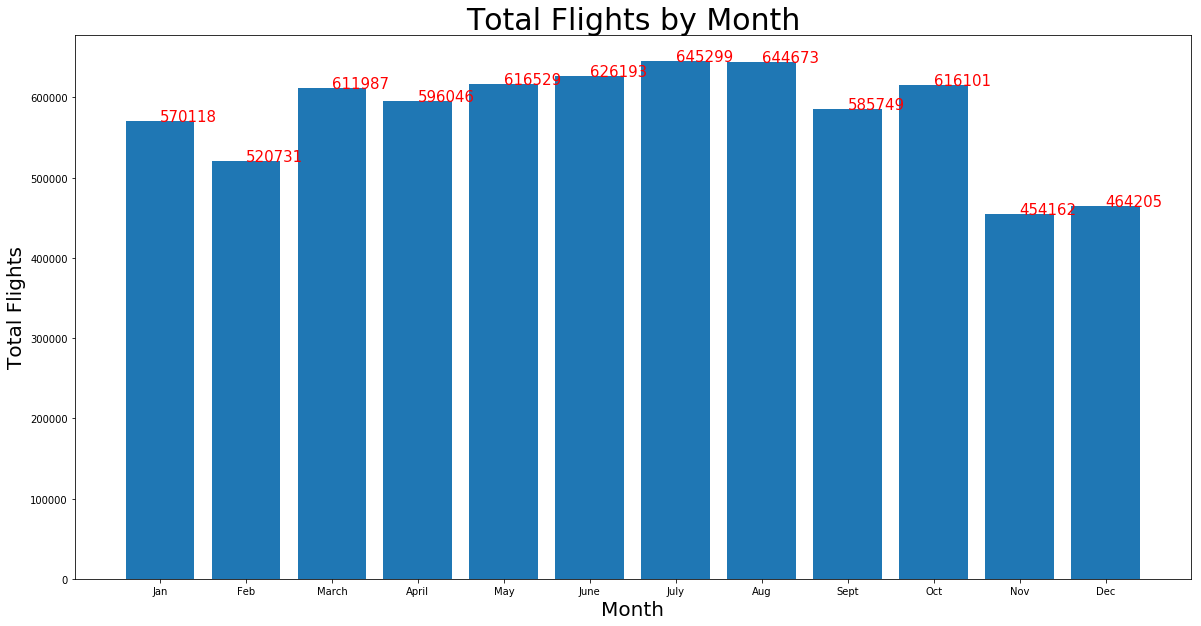

In [12]:
plt.figure(figsize=(20,10))
plt.bar(month, f)
plt.title("Total Flights by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Total Flights', fontsize =20)
for a,b in zip(month, f):
    plt.text(a, b, str(b), fontsize =15, color ='r')
plt.show()

In [13]:
yearly['Months']['January Flights']

570118

## Seasonal 

In [14]:
cancel['FL_DATE'] = pd.to_datetime(cancel['FL_DATE'])
winter_start = '12-21-2017'
winter_end = '03-19-2018'
maskw = (cancel['FL_DATE'] >= winter_start) & (cancel['FL_DATE'] <= winter_end)
winter = cancel.loc[maskw]

spring_start = '03-20-2018'
spring_end = '06-20-2018'
masksp = (cancel['FL_DATE'] >= spring_start) & (cancel['FL_DATE'] <= spring_end)
spring = cancel.loc[masksp]

summer_start = '06-21-2018'
summer_end = '09-21-2018'
masksum = (cancel['FL_DATE'] >= summer_start) & (cancel['FL_DATE'] <= summer_end)
summer = cancel.loc[masksum]

fall_start = '11-01-2017'
fall_end = '12-20-2017'
aut_start = '09-22-2018'
aut_end = '10-31-2018'
maskf = (cancel['FL_DATE'] >= fall_start) & (cancel['FL_DATE'] <= fall_end)
maska = (cancel['FL_DATE'] >= aut_start) & (cancel['FL_DATE'] <= aut_end)
fall = cancel.loc[maskf]
aut = cancel.loc[maska]
fall = fall.append([aut])

In [15]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

In [17]:
s = yearly['Seasons']
sea = list(s.values())
s_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(s)):
    s_pct.append(round((amt[x]/sea[x]) * 100,2))

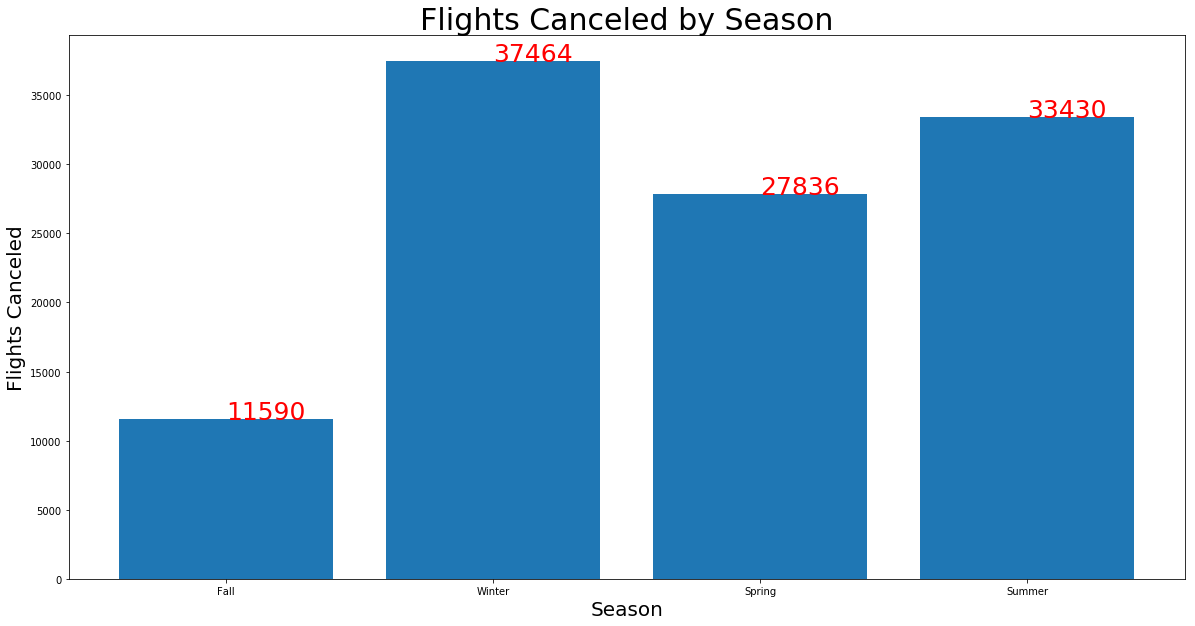

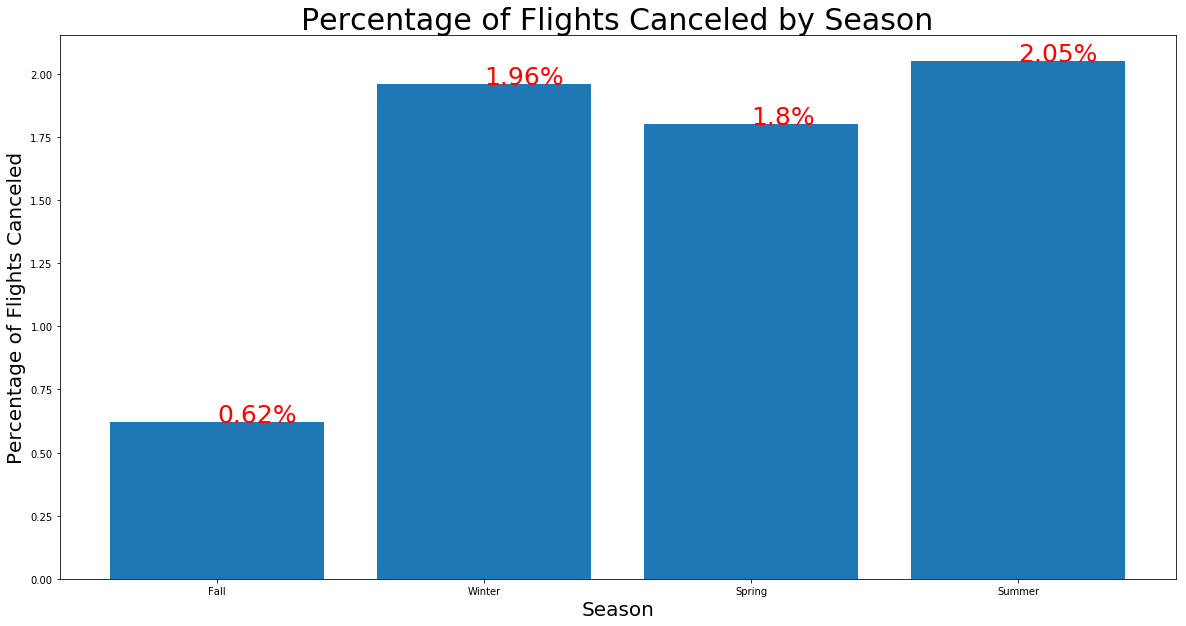

In [219]:
plt.figure(figsize=(20,10))
plt.bar(season, amt)
plt.title("Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(season, amt):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(season, s_pct)
plt.title("Percentage of Flights Canceled by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.ylabel('Percentage of Flights Canceled', fontsize =20)
for a,b in zip(season, s_pct):
    plt.text(a, b, str(b) + '%', fontsize =25, color ='r')
plt.show()

## Airline

#### <B><U> AIRLINE KEY
“9E”,”ENDEAVOR AIR” <br>
"AS","ALASKA AIRLINES"<br>
"B6","JETBLUE AIRLINES"<br>
"DL","DELTA AIRLINES"<br>
“EV”,“EXPRESSJET AIRLINES”<br> 
"F9","FRONTIER AIRLINES"<br>
"G4","ALLEGIANT AIR"<br>
"HA","HAWAIIAN AIRLINES"<br>
“MQ”,”ENVOY AIR”<br>
"NK","SPIRIT AIRLINES"<br>
“OH”,”PSA AIRLINES"<br>
“OO”,”SKYWEST AIRLINES”<br>
"UA","UNITED AIRLINES"<br>
"VX”,”VIRGIN AMERICA"<br>
"WN","SOUTHWEST AIRLINES"<br>
“YV”,”MESA AIRLINES”<br>
“YX”,”REPUBLIC AIRLINE”<br>

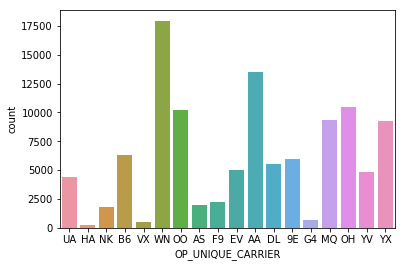

In [19]:
sns.countplot(cancel['OP_UNIQUE_CARRIER'])

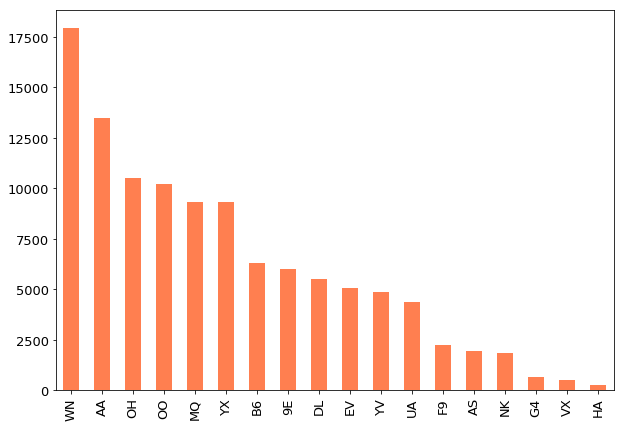

In [20]:
ax = cancel['OP_UNIQUE_CARRIER'].value_counts().plot(kind='bar', 
                    figsize=(10,7),color="coral", fontsize=13)

In [21]:
carrier = sorted(list(set(cancel['OP_UNIQUE_CARRIER'])))
c_ct = cancel['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in carrier]

In [23]:
a = yearly['Airlines']
line = list(a.values())
a_pct = []

#get a list of what % of flights were canceled per month
for x in range(len(a)):
    a_pct.append(round((carry[x]/line[x]) * 100,2))

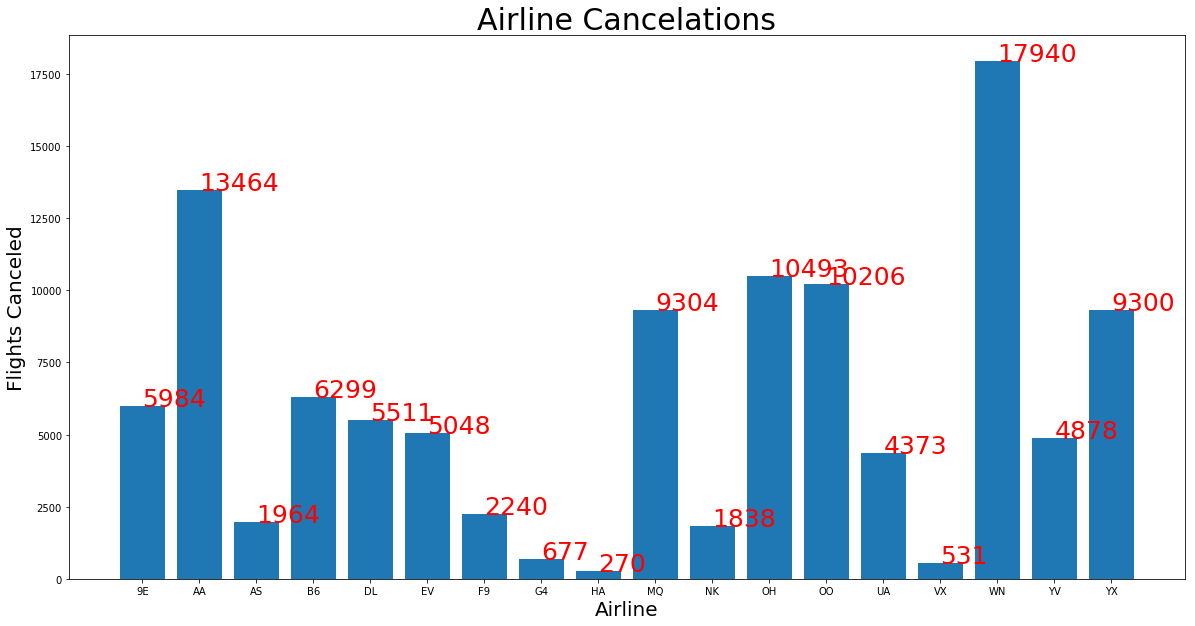

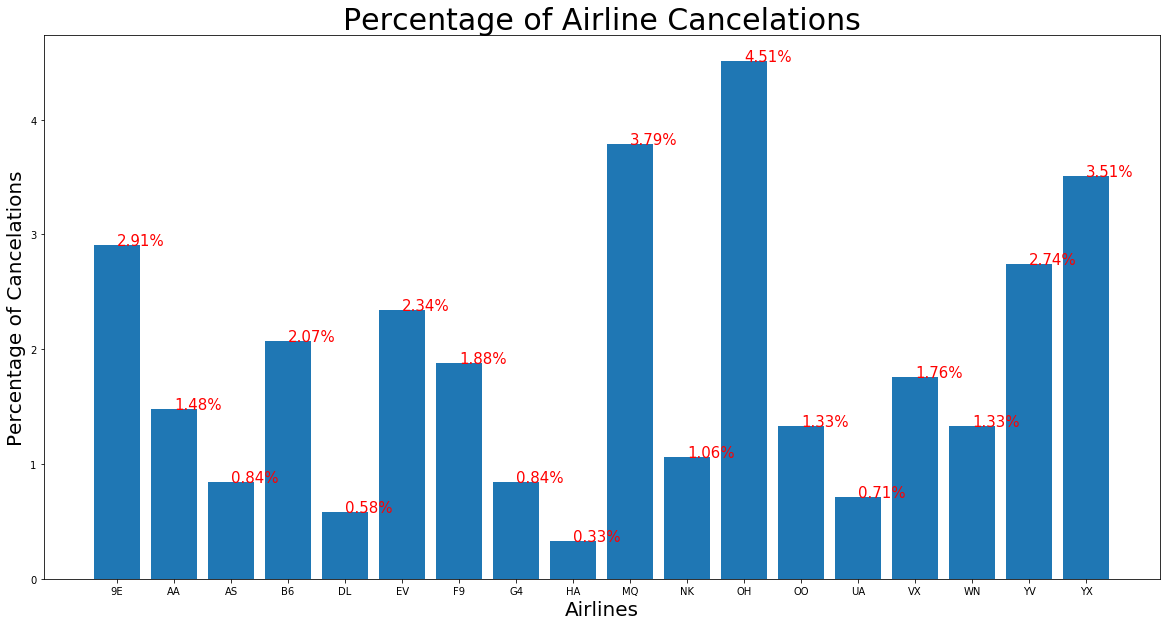

In [221]:
plt.figure(figsize=(20,10))
plt.bar(carrier, carry)
plt.title("Airline Cancelations", fontsize =30)
plt.xlabel('Airline', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(carrier, carry):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(carrier, a_pct)
plt.title("Percentage of Airline Cancelations", fontsize =30)
plt.xlabel('Airlines', fontsize =20)
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(carrier, a_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

## Airports

In [25]:
p = cancel['ORIGIN'].value_counts() 
airport = set(cancel['ORIGIN'])
port = [x for x in airport if p[x] >=1000]
val = [p[x] for x in airport if p[x] >=1000]

In [113]:
o = yearly['Airports']

In [110]:
no_cancel ={}
for air in o:
    if air not in airport:
        no_cancel.update({air : o[air]})

In [116]:
for c in no_cancel:
    print(c)
    del o[c]

YUM
CNY
ELM
WYS
SMX
PRC
HGR
IFP
EAR
AKN
YNG


In [168]:
# b=0
# for x in port:
#     print(x)
#     print(o[x])
#     print(val[b])
#     b+=1

In [148]:
p_pct =[]
b=0
for x in port:
    p_pct.append(round((val[b]/o[x])* 100,2))
    b+=1

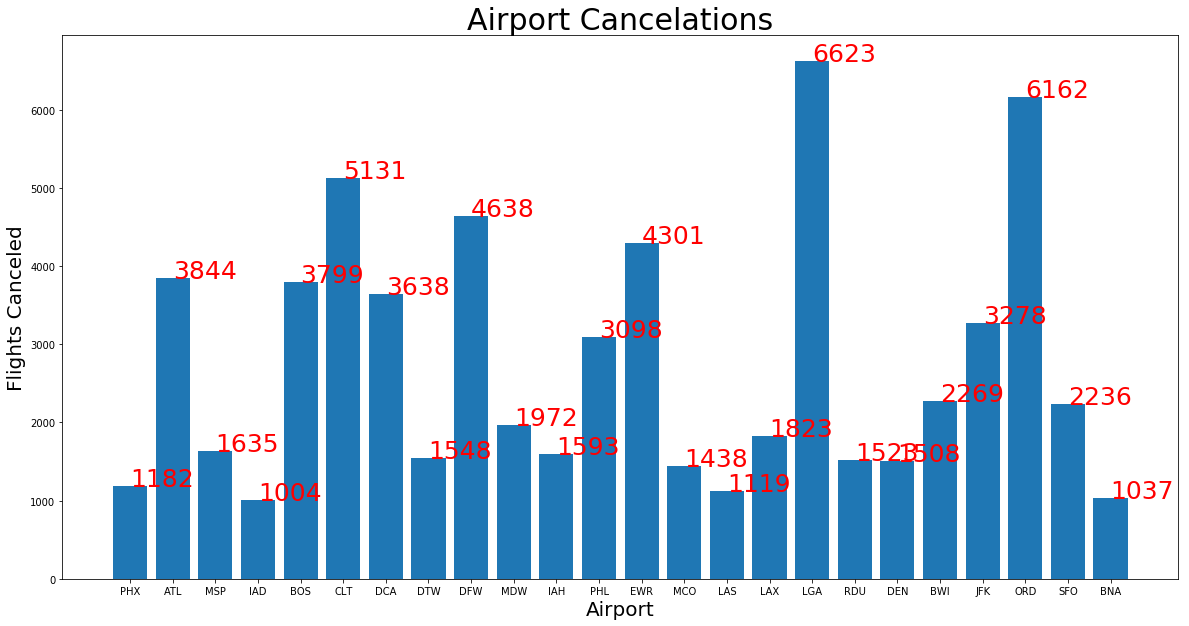

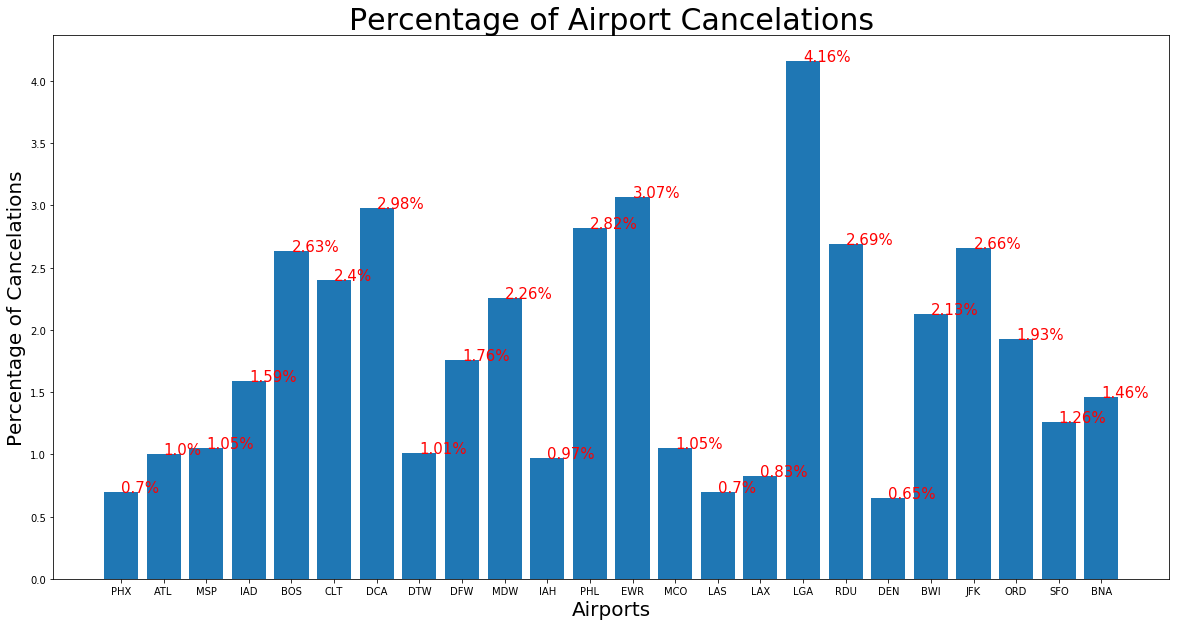

In [222]:
plt.figure(figsize=(20,10))
plt.bar(port, val)
plt.title("Airport Cancelations", fontsize =30)
plt.xlabel('Airport', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(port, val):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

plt.figure(figsize=(20,10))
plt.bar(port, p_pct)
plt.title("Percentage of Airport Cancelations", fontsize =30)
plt.xlabel('Airports', fontsize =20)
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(port, p_pct):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

In [149]:
p_pct

[0.7,
 1.0,
 1.05,
 1.59,
 2.63,
 2.4,
 2.98,
 1.01,
 1.76,
 2.26,
 0.97,
 2.82,
 3.07,
 1.05,
 0.7,
 0.83,
 4.16,
 2.69,
 0.65,
 2.13,
 2.66,
 1.93,
 1.26,
 1.46]

In [122]:
no_cancel

{'YUM': 1355,
 'CNY': 313,
 'ELM': 267,
 'WYS': 239,
 'SMX': 135,
 'PRC': 118,
 'HGR': 113,
 'IFP': 106,
 'EAR': 97,
 'AKN': 63,
 'YNG': 2}

In [202]:
# hundo_thou = [x for x in o if o[x] >=100000]
# full len 344, in thousands len 246, in five thousands len 135
# in ten thousands len 98, in fifty thousads len 39, in hundred thousand len 22

In [207]:
busy =[]
for x in o:
    if len(busy)<25:
        busy.append(x)
    else:
        break

In [212]:
busy_cancel = [round((p[x]/o[x])*100, 2) for x in busy]

In [213]:
busy_cancel

[1.0,
 1.93,
 1.76,
 0.65,
 0.83,
 2.4,
 1.26,
 0.7,
 0.97,
 0.7,
 4.16,
 1.05,
 1.01,
 2.63,
 0.5,
 3.07,
 1.05,
 2.66,
 2.98,
 0.31,
 2.82,
 2.13,
 1.0,
 0.91,
 2.26]

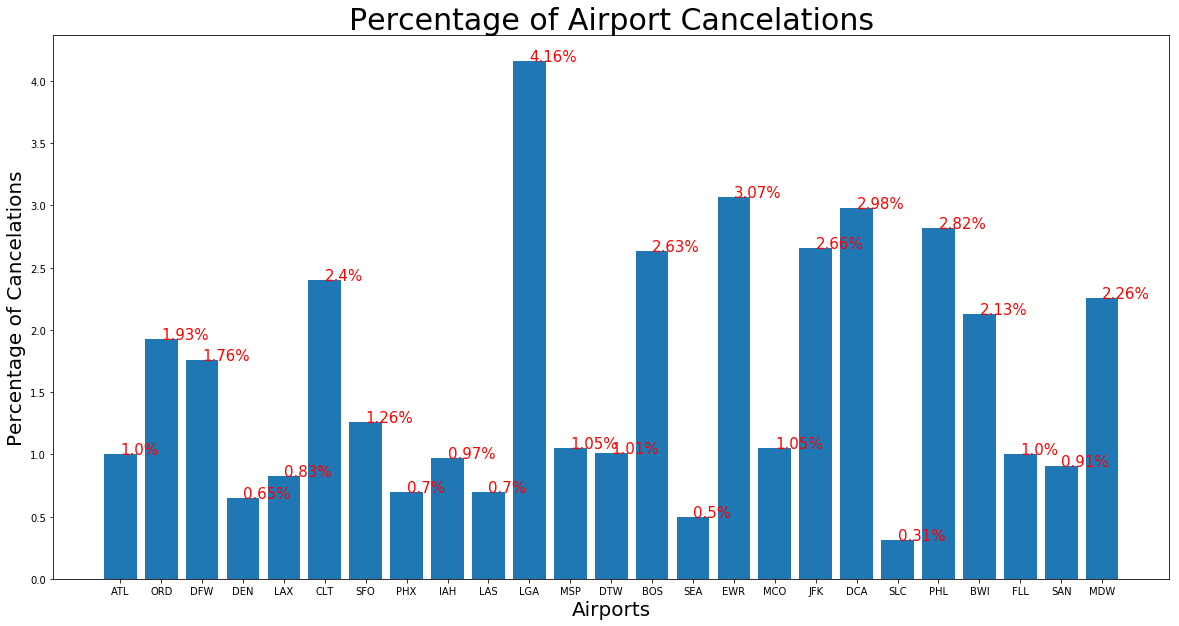

In [218]:
plt.figure(figsize=(20,10))
plt.bar(busy, busy_cancel)
plt.title("Percentage of Airport Cancelations", fontsize =30)
plt.xlabel('Airports', fontsize =20)
plt.ylabel('Percentage of Cancelations', fontsize =20)
for a,b in zip(busy, busy_cancel):
    plt.text(a, b, str(b) + '%', fontsize =15, color ='r')
plt.show()

## Departure Times

In [285]:
dept = cancel['CRS_DEP_TIME'].apply(lambda x: round(x/100,2))

In [286]:
pos = 0
for d in dept:
    dec = (math.modf(d))
    if round(dec[0], 2) >= .29:
        dept[pos] = int(dept[pos]) +1  
#         print("round up")
    else:
        dept[pos] = int(dept[pos])
#         print("round down")
    pos +=1
   
    

round down
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
ro

round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round dow

round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
roun

round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
ro

round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
roun

round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round down
round up
round

round down
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round dow

round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round

round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
r

round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round up
round 

round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
r

round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round dow

round up
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
roun

round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
ro

round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
roun

round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
rou

round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
ro

round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round up
round up
round up
round 

round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
roun

round up
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round up
round up
round

round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round 

round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round 

round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round u

round down
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round d

round down
round up
round down
round up
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
rou

round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
rou

round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
rou

round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round dow

round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up

round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down

round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round dow

round down
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round 

round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round

round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round

round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up

round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
r

round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round u

round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
roun

round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round do

round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
roun

round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round

round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round d

round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round d

round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down


round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round

round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round dow

round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down


round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down

round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round up
round down
round down
round 

round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round do

round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up


round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round

round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up

round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
roun

round up
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round up
round u

round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round d

round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round up


round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
roun

round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round 

round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
r

round down
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round up

round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round

round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
ro

round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up

round down
round up
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
r

round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
rou

round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round

round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
rou

round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round u

round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round 

round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round dow

round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round

round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
r

round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round down
round up
round down
round down
round down
round up
round 

round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down

round down
round down
round up
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
r

round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round dow

round down
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down


round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
rou

round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round

round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
roun

round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
roun

round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round 

round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
roun

round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round dow

round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round

round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
r

round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round up
r

round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round do

round up
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round dow

round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round up
rou

round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up

round down
round up
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up

round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round d

round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round up
round down
round up
round do

round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up


round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round u

round up
round down
round down
round down
round up
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round 

round up
round down
round down
round down
round down
round up
round down
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round down
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round u

round up
round up
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round up
round up
rou

round up
round up
round up
round down
round down
round up
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round down
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
ro

round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down

round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round up
round up
round down
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round u

round up
round down
round up
round down
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
rou

round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round up
roun

round up
round up
round down
round down
round down
round down
round up
round up
round down
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round

round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round up
roun

round up
round up
round down
round down
round up
round down
round down
round up
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round up
round down
round down
round up
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up
r

round up
round up
round up
round down
round up
round down
round down
round down
round down
round up
round down
round down
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round up
round up
round down
round down
round down
round up
round down
round up
round up
round down
round down
round up
round up
round down
round down
round down
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round up
round up
round down
round down
round down
round down
round up
round up
round up
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round up
round up
round up
round up
round down
round down
round down
round down
round down
round up
round down
round down
round down
round up
round up
round up
round up
round up
round up
round down
round up
round up
round up
round down
round up
round up
round down
round up
round down

round up
round up
round up
round up
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round down
round up
round down
round down
round down
round up
round up
round up
round down
round down
round up
round down
round down
round down
round down
round down
round down
round down
round up
round up
round up
round down
round up
round down
round up
round up
round down
round down
round down
round up
round up
round down
round up
round up
round down
round up
round up
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round down
round up
round down
round down
round up
round down
round up
round down
round down
round up
round down
round up
round down
round up
round up
round up
round up
round up
round down
round down
round down
round up
round down
round up
round down
round down
round down
round down
round up


In [296]:
hour = [x for x in range(25)]
time = dept.value_counts()
timefreq = [time[x] for x in range(25)]

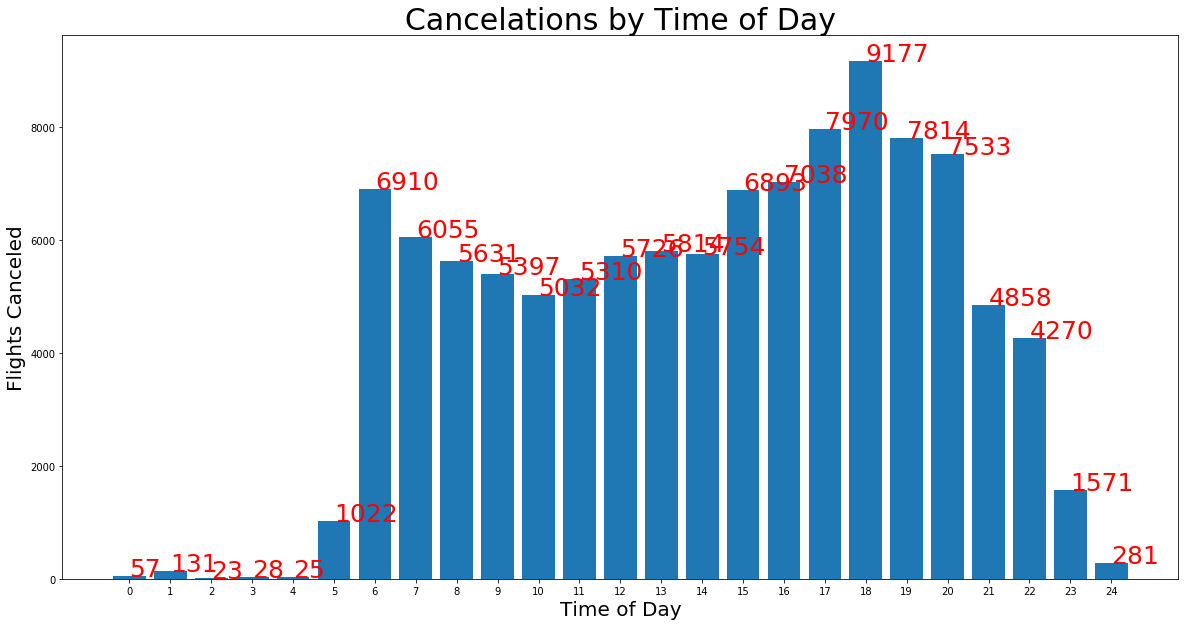

In [306]:
plt.figure(figsize=(20,10))
plt.bar(hour, timefreq)
plt.title("Cancelations by Time of Day", fontsize =30)
plt.xlabel('Time of Day', fontsize =20)
plt.xticks(range(0,25))
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(hour, timefreq):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

## Day of Week

In [229]:
week = cancel['DAY_OF_WEEK'].value_counts()
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekfreq = [week[x] for x in range(1,8)]

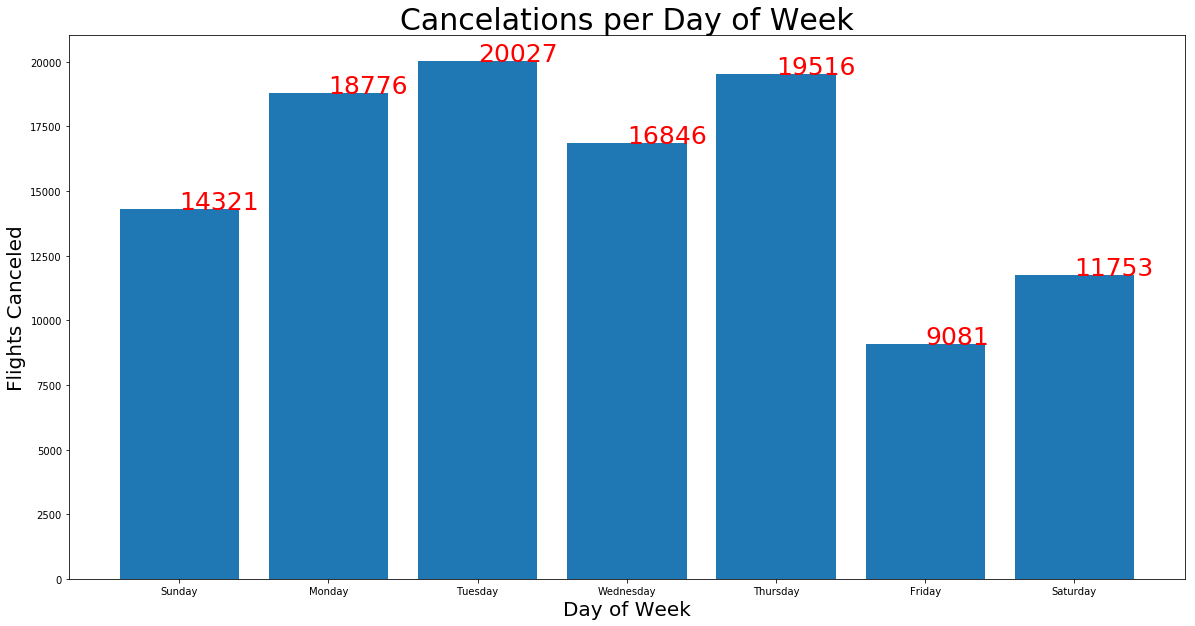

In [305]:
plt.figure(figsize=(20,10))
plt.bar(weekday, weekfreq)
plt.title("Cancelations per Day of Week", fontsize =30)
plt.xlabel('Day of Week', fontsize =20)
plt.ylabel('Flights Canceled', fontsize =20)
for a,b in zip(weekday, weekfreq):
    plt.text(a, b, str(b), fontsize =25, color ='r')
plt.show()

In [ ]:
cancel[3]